# 08A. Monte Carlo Simulations: Monte Carlo Methods

### Mingyang Lu

### 3/11/2024

Monte Carlo methods are widely used numerical algorithms based on random sampling. Here, we illustrate its usages in a few simple examples. # Estimating $\pi$A classic example of Monte Carlo method is to estimate $\pi$. Here, we show two different approaches.### Estimating the area of a circleIn the first approach, we randomly sample many points evenly in a 2D square, ranging from (-1, 1) for both $x$ and $y$ coordinates. We compute the fraction of points in the circle of center (0,0) and radius 1. We know from geometry that this fraction $P$ equals to the ratio of the area of the circle and the area of the square. Thus,$$P = \frac{\pi r^2}{(2r)^2} = \frac{\pi}{4} \tag{1}.$$So, we can estimate $\pi$ by$$\pi = 4P \tag{2}.$$Here is the implementation of the Monte Carlo method. (Q: think why it works)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mc_pi(n):
    rng_xy = np.random.uniform(low=-1, high=1, size=(n, 2))
    distances = np.sum(rng_xy ** 2, axis=1)
    incircle = distances <= 1
    return (np.sum(incircle) / n) * 4

np.random.seed(1)
result = mc_pi(10**4)
print(result)

3.1436


When the total number of sampling $n = 10^4$, the estimation slightly deviates from the actual value. We can write a script to systematically evaluate the estimation for a series of $n$. (see how the function *cumsum* is used here)


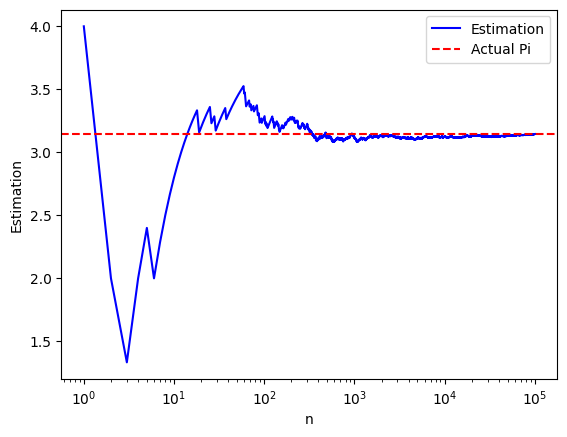

In [2]:
def mc_pi_sample(n):
    rng_xy = np.random.uniform(low=-1, high=1, size=(n, 2))
    distances = np.sum(rng_xy ** 2, axis=1)
    incircle = distances <= 1
    pi_estimate = np.cumsum(incircle) / np.arange(1, n + 1) * 4
    return pi_estimate

n = 10**5
estimation = mc_pi_sample(n)

plt.plot(np.arange(1, n + 1), estimation, 'b-', label='Estimation')
plt.axhline(y=np.pi, color='r', linestyle='--', label='Actual Pi')
plt.xscale('log')
plt.xlabel('n')
plt.ylabel('Estimation')
plt.legend()
plt.show()

When $n \sim 10^5$, the estimation becomes good. We can visualize how the Monte Carlo method samples points inside the circle of radius 1. 

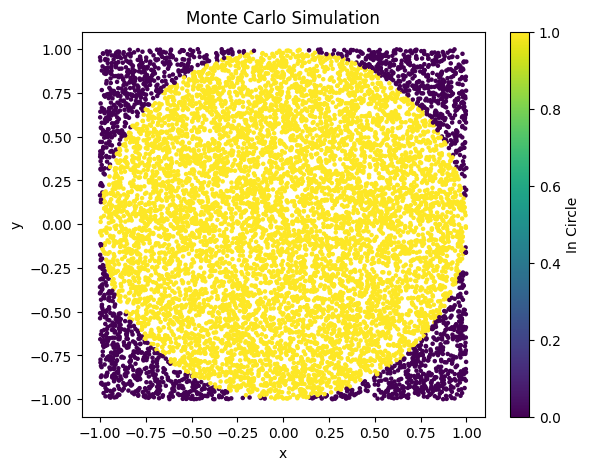

In [3]:
np.random.seed(1)

n = 10**4
rng_xy = np.random.uniform(low=-1, high=1, size=(n, 2))
incircle = np.sum(rng_xy ** 2, axis=1) <= 1

# Create a scatter plot
plt.figure(figsize=(6.5, 5))
plt.scatter(rng_xy[:, 0], rng_xy[:, 1], c=incircle, cmap='viridis', s=5)
plt.colorbar(label='In Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Monte Carlo Simulation')
plt.show()

### Buffon's needle problem

<center> <img src="fig08A1.png", width = 20%>  </center><br/>

For verticle strips of even width $d$ and needles of length $l$, the probability for a needle to cross the strips$$P = \frac{2l}{\pi d} \tag{3}$$, as long as $l < d$. Thus, we can estimate $\pi$ by$$\pi = \frac{2l}{Pd} \tag{4}.$$We can compute the probably $P$ by random sampling. In the implementation below, we consider a 2D space with $x$ and $y$ coordinates, where stripes are presented at two vertical lines $x=0$ and $x=d$.  We first sample the $x$ coordinate of the one end of the needle uniformly from $(0, d)$, $x_1$. Then, we sample another two random numbers from a uniform distribution from (-1, 1) to represents the coordindate ($x_2$, $y_2$) of a new point. If the point is outside the circle of radius 1 and center (0, 0), we reject and re-sample the point again. Once, we obtain a point within the circle, we calculate the direction of the needle from the one end to the other by a unit vector $(\frac{x_2}{\sqrt{x_2^2+y_2^2}}, \frac{y_2}{\sqrt{x_2^2+y_2^2}})$.

Thus, the $x$ coordinate of the other end of the needle, $x_3$, would be $$ x_3 = x_1 + l\frac{x_2}{\sqrt{x_2^2+y_2^2}} \tag{5}$$Finally, we check whether $x_3$ is outside the range of $(0, d)$, *i.e.*, the needle would cross the strips, when$x_3(d - x_3) \le 0 \tag{6}$Below shows the code to implement this Monte Carlo method.

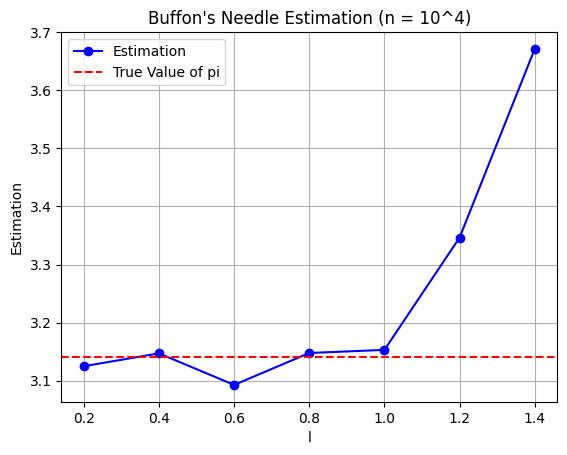

In [4]:
def needle_drop(d, l):
    x1 = np.random.uniform(0, d)  # x coordinate for one end of the needle
    while True:
        x2 = np.random.uniform(-1, 1, size=2)
        r2 = np.sum(x2 ** 2)
        if r2 <= 1:
            break
    x1 += x2[0] / np.sqrt(r2) * l  # update the x coordinate for the other end of the needle
    return x1 * (d - x1) <= 0

def buffon(n, d, l):
    if_across = np.array([needle_drop(d, l) for _ in range(n)])
    return np.sum(if_across) / n

np.random.seed(1)
d = 1
l = np.arange(0.2, 1.6, 0.2)
p = np.array([buffon(10**4, d, length) for length in l])
pi_est = 2 / p * l / d

plt.plot(l, pi_est, 'bo-', label='Estimation')
plt.axhline(y=np.pi, color='r', linestyle='--', label='True Value of pi')
plt.xlabel('l')
plt.ylabel('Estimation')
plt.title('Buffon\'s Needle Estimation (n = 10^4)')
plt.legend()
plt.grid(True)
plt.show()

As shown above, when we sample $n=10^4$ times, the estimation of $\pi$ by the Monte Carlo method still deviate from the actual value. When $l >d$, the Equations (3-4) become invalid, therefore even more deviations. When the total number of sampling $n = 10^5$, the estimation of $\pi$ is more accurate. The Monte Carlo simulations based on the Buffon's needle problem is intuitive, but slow to compute in this illustration. 

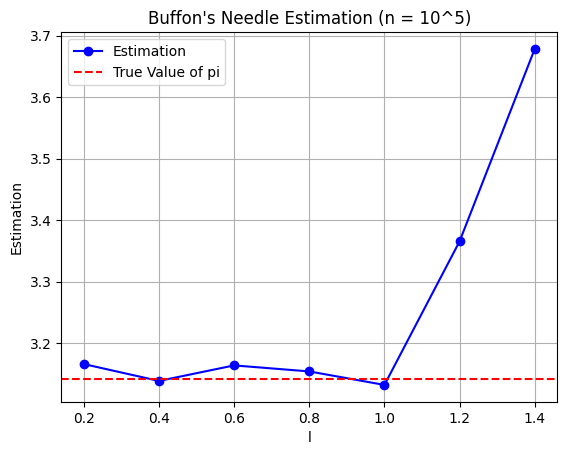

In [5]:
np.random.seed(1)

d = 1
l = np.arange(0.2, 1.6, 0.2)
p = np.array([buffon(10**5, d, length) for length in l])
pi_est = 2 / p * l / d

plt.plot(l, pi_est, 'bo-', label='Estimation')
plt.axhline(y=np.pi, color='r', linestyle='--', label='True Value of pi')
plt.xlabel('l')
plt.ylabel('Estimation')
plt.title('Buffon\'s Needle Estimation (n = 10^5)')
plt.legend()
plt.grid(True)
plt.show()

It is worth noting that the rejection step is important. Otherwise, the unit direction of the needle is not sampled uniformly in the angle space. Readers can try a version without the rejection method, to see how the estimation is affected.

# IntegrationNumerical integration can be achieved by Monte Carlo methods using random numbers. ### Function integrationTo integrate a function $f(x)$, we can use the midpoint rule $$I = \int_{x_1}^{x_2}{f(x)dx} = \sum_{i = 1}^n f(m_i)\Delta x \tag{7},$$where $m_i$ are the midpoint of $i^{th}$ interval of $x$. For example, we consider $f(x) = e^{-x^2}$.The analytical solution of the integration from 0 to $\infty$ is: $$I = \int_0^{\infty}{e^{-x^2}dx} = \frac{\sqrt{\pi}}{2}\tag{8}.$$We can numerically estimate the integration from the lower and upper limits $x_1 = 0$ and $x_2 = 3$.

In [6]:
def f1(x):
    return np.exp(-x ** 2)

def midpoint(f, x1, x2, n):
    dx = (x2 - x1) / n
    dx_half = dx / 2
    mid = np.arange(x1 + dx_half, x2 - dx_half, dx)
    f_mid = f(mid)
    return np.sum(f_mid) * dx

result = midpoint(f1, 0, 3, 1000)
print(result)

0.8862069749615151


We can also use Monte Carlo simulation, by randomly sampling $x$ from a uniform distribution in $(x_1, x_2)$ and; for each $x$, we evaluate $f(x)$.

$$I = \frac{x_2 - x_1}{n}\sum_{i=1}^{n}f(x_i)  \tag{9},$$

where the factor $\frac{x_2 - x_1}{n}$ is essentially $\Delta x$.

Below illustrates random sampling for ten times and 100 times, respectively.

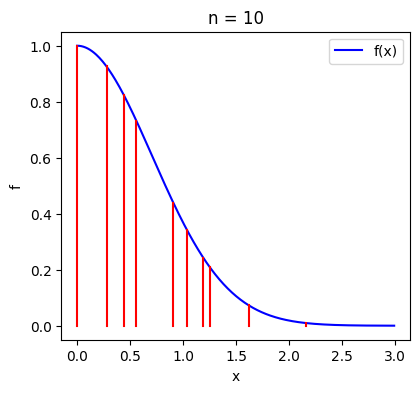

In [7]:
# n = 10
np.random.seed(1)
x_all = np.arange(0, 3, 0.01)
f_all = np.exp(-x_all ** 2)
rng = np.random.uniform(0, 3, size=10)

plt.figure(figsize=(4.5, 4))
plt.plot(x_all, f_all, color='blue', label='f(x)')
for x in rng:
    plt.plot([x, x], [0, np.exp(-x ** 2)], color='red')

plt.xlabel('x')
plt.ylabel('f')
plt.title('n = 10')
plt.legend()
plt.show()

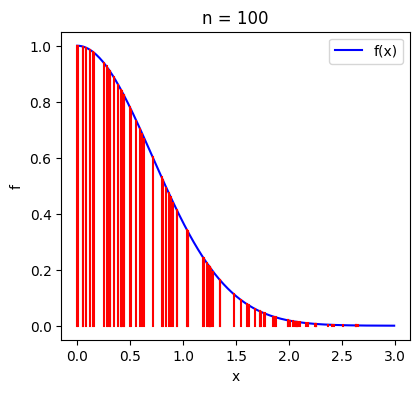

In [8]:
# n = 100
np.random.seed(1)
rng = np.random.uniform(0, 3, size=100)

plt.figure(figsize=(4.5, 4))
plt.plot(x_all, f_all, color='blue', label='f(x)')
for x in rng:
    plt.plot([x, x], [0, np.exp(-x ** 2)], color='red')

plt.xlabel('x')
plt.ylabel('f')
plt.title('n = 100')
plt.legend()
plt.show()

Numerical integration using random sampling:

In [9]:
def mc_integration(f, x1, x2, n):
    # f: f(x) function
    # x1: x lower bound
    # x2: x upper bound
    # n: number of samples
    
    rng = np.random.uniform(low=x1, high=x2, size=n)
    f_random = f(rng)
    dx = (x2 - x1) / n
    return np.sum(f_random) * dx

np.random.seed(1)

# Define the function f1
def f1(x):
    return np.exp(-x ** 2)

result = mc_integration(f1, 0, 3, 10**4)
print(result)

0.8906676126456481


Q: how to estimate the accuracy and convergence of the MC methods?

### Importance sampling algorithm

$x$ can also be sampled from any distribution $p(x)$. Because

$$I = \int_{x_1}^{x_2}{f(x)dx} = \int_{x_1}^{x_2}{\frac{f(x)}{p(x)}p(x)dx} \tag{10},$$

we can use Monte Carlo method to sample $x$ from the distribution $p(x)$, then we perform numerical integration as follows.

$$I = \frac{1}{n} \sum_{i=1}^{n}\frac{f(x_i)}{p(x_i)} \tag{11}.$$

This is called importance sampling. Here, for $x$ values where $f(x)$ are very small, sampling $x$ less from these values would be desired for a better convergence. Thus, one can choose $p(x)$ for a more efficient sampling.

In the following implementation, we sample $x$ from $(x_1, x_2)$ in an exponential distribution $p(x) = e^{-x}$. We can choose much larger range of $x$ in the importance sampling.

Below illustrates the importance sampling using an exponential distribution.

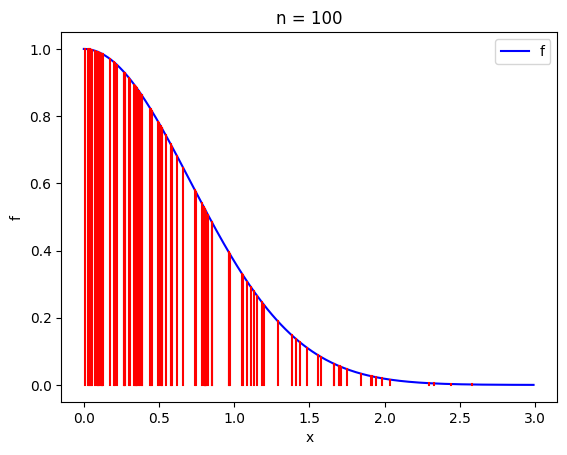

In [10]:
np.random.seed(1)

# Define the function f1
def f1(x):
    return np.exp(-x ** 2)

xall = np.arange(0, 3, 0.01)
f_all = f1(xall)
rng = np.random.uniform(low=np.exp(-3), high=np.exp(0), size=100)
rng_exp = -np.log(rng)  # exponential distribution

plt.plot(xall, f_all, color='blue', linestyle='-', label='f')
for x in rng_exp:
    plt.plot([x, x], [0, f1(x)], color='red', linestyle='-')

plt.xlabel('x')
plt.ylabel('f')
plt.title('n = 100')
plt.legend()
plt.show()

Numerical integration using importance sampling:

In [11]:
def mc_integration_importance_exp(f, x1, x2, n):
    # f: f(x) function
    # x1: x lower bound
    # x2: x upper bound
    # n: n sampling
    rng = np.random.uniform(low=np.exp(-x2), high=np.exp(-x1), size=n)
    rng_exp = -np.log(rng)  # exponential distribution
    f_random = f(rng_exp) / np.exp(-rng_exp)
    return np.sum(f_random) / n

# Assuming f1 is defined somewhere
result = mc_integration_importance_exp(f=f1, x1=0, x2=100, n=10**4)
print(result)

0.8858154275250197


Compared to the previous MC method using the same $x$ ranges, the importance sampling resutls converge to the right answer ($\sqrt{\pi}/2$) much faster.

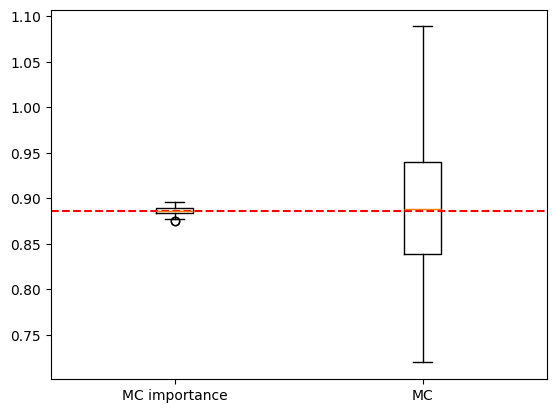

In [12]:
def replicate(func, times):
    return np.array([func() for _ in range(times)])

output1_100 = replicate(lambda: mc_integration_importance_exp(f=f1, x1=0, x2=100, n=10**4), 100)
output2_100 = replicate(lambda: mc_integration(f=f1, x1=0, x2=100, n=10**4), 100)

results = np.column_stack((output1_100, output2_100))
plt.boxplot(results)
plt.axhline(y=np.sqrt(np.pi) / 2, color='r', linestyle='--')
plt.xticks([1, 2], ['MC importance', 'MC'])
plt.show()